In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from GenerateInput import generate_input
from LifeStepFunctions import life_step_for_tensors
from CostumisedLayers import *
from models import GameOfLifeModel


In [7]:
# creating input for the 3x3 grid model
# the input is all possible 3x3 grids, i.e 2^9=512 grids

x_train = list()
for x in product([0,1], repeat=9):
    x1, x2, x3, x4, x5, x6, x7, x8, x9 = x
    sample = [[x1, x2, x3], [x4, x5, x6], [x7, x8, x9]]
    x_train.append(sample)

x_train = tf.constant(np.array(x_train), dtype='float32')
y_train = life_step_for_tensors(x_train)

In [4]:
# defining the model for the 3x3 grid

model_3x3 = tf.keras.models.Sequential()
model_3x3.add(tf.keras.layers.Flatten())
model_3x3.add(tf.keras.layers.Dense(2, activation='relu'))
model_3x3.add(tf.keras.layers.Dense(6, activation='relu'))
model_3x3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [6]:
# training the 3x3 grid model

model_3x3.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

model_3x3.fit(x_train, y_train, epochs=150, batch_size=10)

Train on 512 samples
Epoch 1/150
512/512 [==============================] - 1s 1ms/sample - loss: 0.0132 - accuracy: 1.0000
Epoch 2/150
512/512 [==============================] - 0s 188us/sample - loss: 0.0125 - accuracy: 1.0000
Epoch 3/150
512/512 [==============================] - 0s 205us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 4/150
512/512 [==============================] - 0s 197us/sample - loss: 0.0116 - accuracy: 1.0000
Epoch 5/150
512/512 [==============================] - 0s 195us/sample - loss: 0.0111 - accuracy: 1.0000
Epoch 6/150
512/512 [==============================] - 0s 200us/sample - loss: 0.0107 - accuracy: 1.0000
Epoch 7/150
512/512 [==============================] - 0s 197us/sample - loss: 0.0103 - accuracy: 1.0000
Epoch 8/150
512/512 [==============================] - 0s 188us/sample - loss: 0.0100 - accuracy: 1.0000
Epoch 9/150
512/512 [==============================] - 0s 177us/sample - loss: 0.0095 - accuracy: 1.0000
Epoch 10/150
512/512 [==============

&lt;tensorflow.python.keras.callbacks.History at 0x29d81d03dc8&gt;

In [8]:
#checking graphically the model_3x3 has 100% accuracy

# y_pred = (model_3x3.call(x_train) > 0.5)
# y_pred = tf.cast(y_pred, dtype="float32")

# y_pred = tf.reshape(y_pred, shape=(16,32))
# y_train = tf.reshape(y_train, shape=(16,32))

# plt.figure(figsize=(16, 24))
# for i in range(len(y_pred)):
#     plt.subplot(48, 1, i+1 + 2*i)
#     plt.imshow([y_pred[i]])
    
#     plt.subplot(48, 1, i+2+ 2*(i))
    
#     plt.imshow([y_train[i]])

In [7]:
model_3x3.save('model_3x3')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_3x3\assets


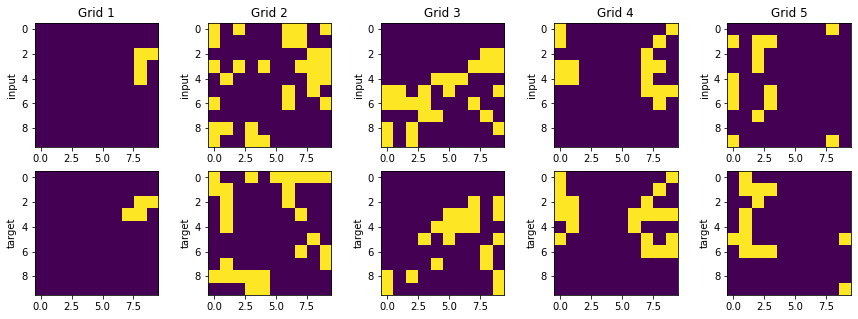

In [2]:
# generating some inputs and targets for the general mode

x, y = generate_input(trials=8, grid_shape=(10,10),steps_before_generating_output=2)


plt.figure(figsize=(3*len(x), 5))
for i in range(len(x)):
    plt.subplot(2, len(x), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(x[i])
    plt.ylabel('input')
    plt.subplot(2, len(x), len(x)+i+1)
    plt.imshow(y[i])
    plt.ylabel('target')
    

In [3]:
model_3x3 = tf.keras.models.load_model('model_3x3')

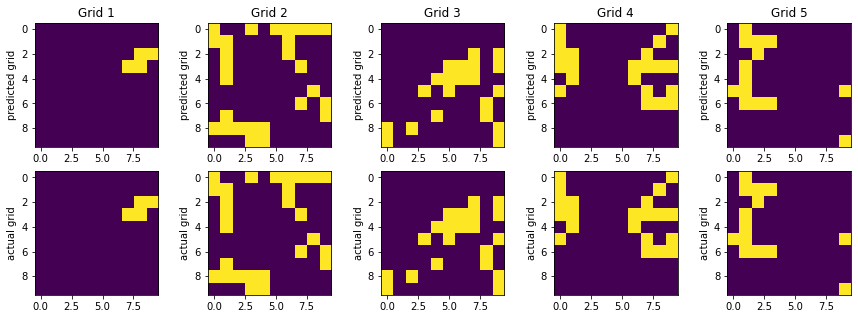

In [4]:

# checking that the general model actually works
game = GameOfLifeModel((10,10), model_3x3)

inputs = tf.keras.layers.Input(shape=(10,10), batch_size=len(x))
game(inputs)

y_pred = game.predict(x)

y_pred = tf.constant(y_pred)
y_pred = (y_pred > 0.5)
y__pred = tf.cast(y_pred, dtype="float32")

plt.figure(figsize=(3*len(x), 5))
for i in range(len(y)):
    plt.subplot(2, len(y), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(y_pred[i])
    plt.ylabel('predicted grid')
    plt.subplot(2, len(y), len(y)+i+1)
    plt.imshow(y[i])
    plt.ylabel('actual grid')